In [1]:
import sys
sys.path.append('/data/users/s/e/seturnbu/repos/forecast-workflow/')

from models.aem3d.AEM3DSheet  import AEM3DSheet

In [2]:
# Open up an AEM3D Lake Surface Sheet as an Xarray dataset
#	The Coordinate Reference System (CRS) is set in the returned xarray.
#   By default a coordinate update is done to transpose X and Y and the direction of Y.
#   Pass twist=False to turn off the coordinate changes

methsheet = AEM3DSheet.open(file="/netfiles/ciroh/30dayHABsHindcast/test/randomForestCQ/baseline/2023/20230805/aem3d-run/outfiles/nc/sheet_surface_forecast.nc")


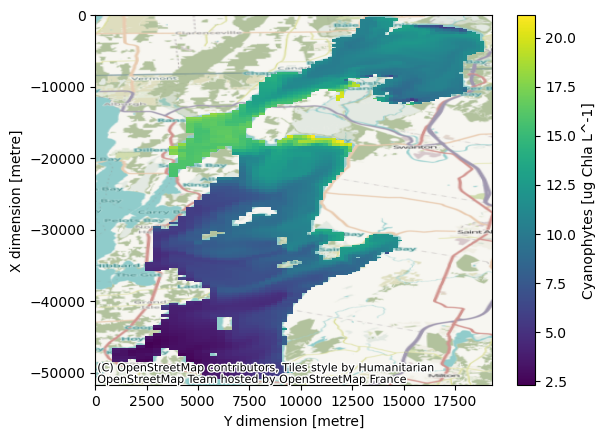

In [3]:
# Plot a single time slice of a variable from the surface sheet
#	This basic call plots the original sheet data with no reprojection
#	Returns the plot object that can be used to set other plot features
axis = AEM3DSheet.plot(methsheet['CYANO'][400])

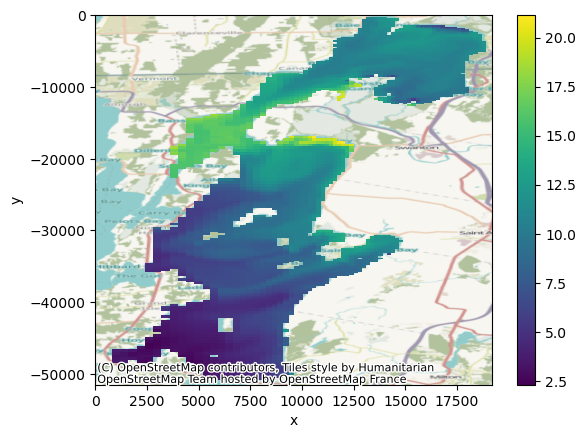

In [4]:
#  Example of a plot using an interpolated view of the sheet data
#	Generates a regular grid based on the irregular mesh grid of the original data
#	Use of the regular grid assists in reprojections that may be done later
axis = AEM3DSheet.plot(AEM3DSheet.interpolate(methsheet['CYANO'][400]))

Masking by _FillValue


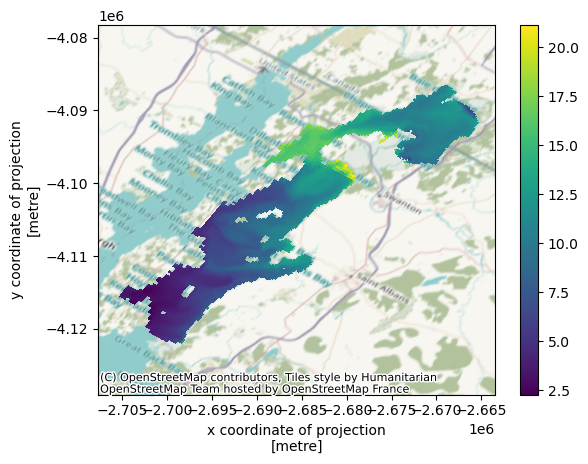

In [5]:
# Example of reprojection during the plot process
#	In this example a widely different projected CRS was chosen to highlight the difference
axis = AEM3DSheet.plot(AEM3DSheet.interpolate(methsheet['CYANO'][400]),crs='EPSG:3574')

Masking by _FillValue


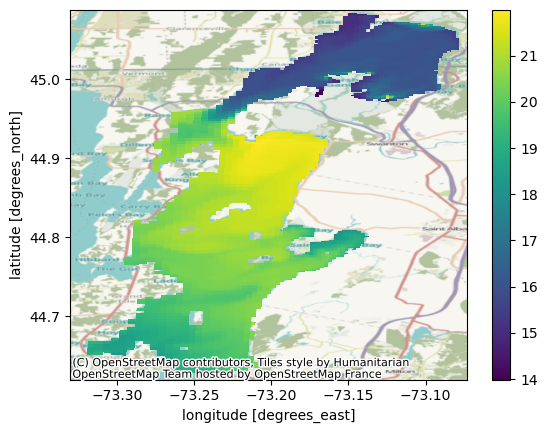

In [6]:
# Example of a reprojection to a view similar to the original Coordinate Reference System
#	Note the axis units change from the original meters from origin to Degrees and Seconds
#	Note the different sheet variable called out for the same time slice as above
axis = AEM3DSheet.plot(AEM3DSheet.interpolate(methsheet['TEMPERATURE'][400]),crs='EPSG:4326')

Masking by _FillValue
Masking by _FillValue
Masking by _FillValue
Masking by _FillValue


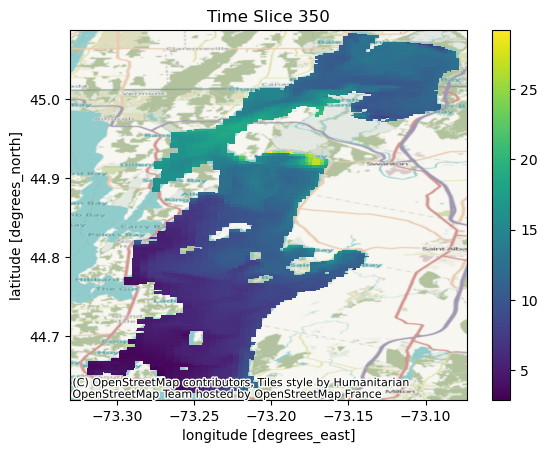

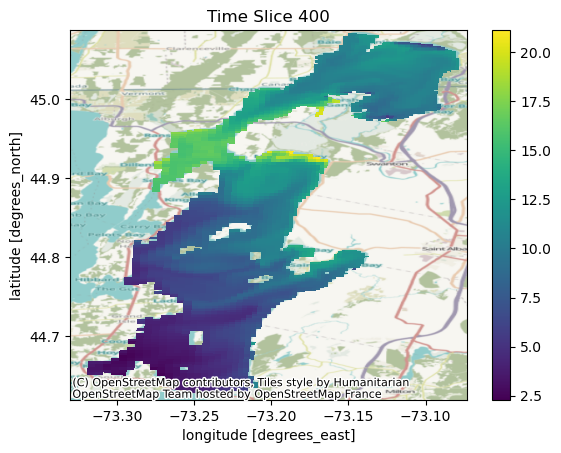

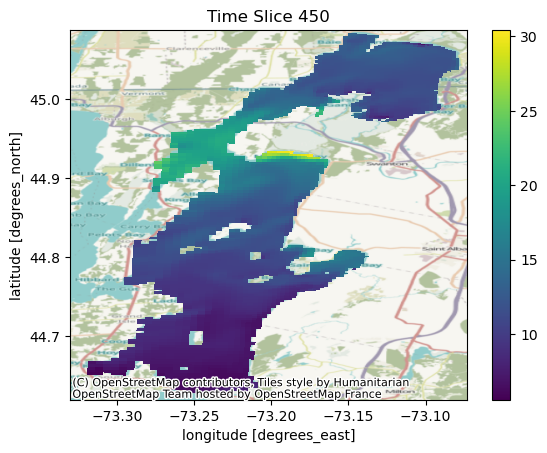

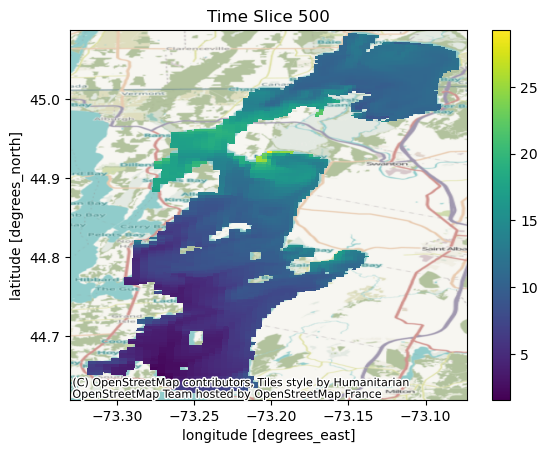

In [7]:
# Example of calling the interpolate, and reprojecting plot for multiple time slices
#	Note the use of the optional "title=" parameter to mark the multiple generated plots
for slice in range(350, 550, 50) :
    
	AEM3DSheet.plot(AEM3DSheet.interpolate(methsheet['CYANO'][slice]),crs='EPSG:4326',title='Time Slice '+str(slice))